In [1]:
import numpy as np
import matplotlib.pyplot as plt

from src.models.weights import V1_weights, V1_covariance_matrix

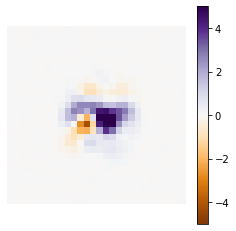

In [2]:
h = 1000
s, f, c = 2.5, 2, (14, 14)
dim = (28, 28)

# generate weights
W = V1_weights(h, dim, s, f, c, seed=20)

# plot
w = W[3].reshape(dim)
fig = plt.figure(figsize=(4, 4))
plt.imshow(w, cmap='PuOr')
plt.clim(-5, 5)
plt.axis('off')
plt.colorbar()

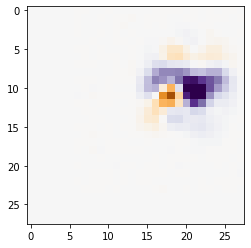

In [3]:
center = np.array([10, 20])
x_shift, y_shift = center - np.array(c)
w_new = np.roll(w, x_shift, axis=0)
w_new = np.roll(w_new, y_shift, axis=1)

# shift in the x-direction
if x_shift > 0:
    w_new[:x_shift, :] = 0
elif x_shift < 0:
    w_new[x_shift:, :] = 0

# shift in y direction
if y_shift > 0:
    w_new[:, :y_shift] = 0
elif y_shift < 0:
    w_new[:, y_shift:] = 0

fig = plt.figure()
plt.imshow(w_new, cmap='PuOr')
plt.clim(-5, 5)

In [4]:
dim = (28, 28)
num_weights = 1000

# reshape the weights array
c = (int(dim[0]/ 2), int(dim[1]/2))
W = V1_weights(num_weights, dim, 2.5, 2, c, seed=20)
W = W.reshape(-1, dim[0], dim[1])

# generate new centers and shifts
centers = np.random.randint((dim[0], dim[1]), size=(num_weights, 2)) 
shifts = centers - c

# new weights
W_new = np.zeros_like(W)
for i, [x_shift, y_shift] in enumerate(shifts):
    W_new[i] = np.roll(W[i], x_shift, axis=0)
    W_new[i] = np.roll(W_new[i], y_shift, axis=1)
    
    if x_shift > 0:
        W_new[i, :x_shift, :] = 0
    elif x_shift < 0:
        W_new[i, x_shift:, :] = 0
    if y_shift > 0:
        W_new[i, :, :y_shift] = 0
    elif y_shift < 0:
        W_new[i, :, y_shift:] = 0

/home/bpandey/anaconda3/envs/random_features/lib/python3.8/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


Text(0.5, 1.0, '[11  2]')

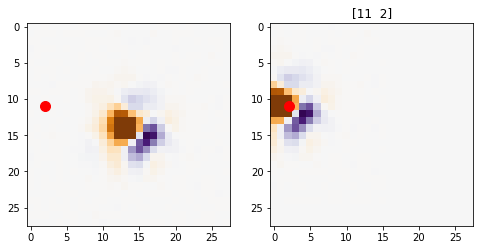

In [5]:
i = np.random.randint(num_weights)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(W[i], cmap='PuOr')
plt.clim(-5, 5)
plt.plot(centers[i][1], centers[i][0], 'ro', markersize=10)

ax = fig.add_subplot(1, 2, 2)
plt.imshow(W_new[i], cmap='PuOr')
plt.clim(-5, 5)
plt.plot(centers[i][1], centers[i][0], 'ro', markersize=10)
plt.title(centers[i])

In [6]:
def shift_pad(img, y_shift, x_shift):
    '''
    Given an image, we shift every pixel by x_shift and y_shift. We zero pad the portion
    that ends up outside the original frame. We think of the origin of the image
    as its top left. The co-ordinate frame is the matrix kind, where (a, b) means
    ath row and bth column.
    
    Parameters
    ----------
    img: array-like
        image to shift
        
    y_shift: int
        Pixel shift in the vertical direction
        
    x_shift: int
        Pixel shift in the horizontal direction
    
    Returns
    -------
    img_shifted: array-like with the same shape as img
        Shifted and zero padded image

    '''
    img_shifted = np.roll(img, x_shift, axis=1)
    img_shifted = np.roll(img_shifted, y_shift, axis=0)
    
    if y_shift > 0:
        img_shifted[:y_shift, :] = 0
    if y_shift < 0:
        img_shifted[y_shift:, :] = 0
    if x_shift > 0:
        img_shifted[:, :x_shift] = 0
    if x_shift < 0:
        img_shifted[:, x_shift:] = 0
    return img_shifted
    

def V1_weights(num_weights, dim, size, spatial_freq, center=None, scale=1, seed=None):
    """
    Generate random weights inspired by the tuning properties of the 
    neurons in Primary Visual Cortex (V1).

    If a value is given for the center, all generated weights have the same center
    If value is set to None, the centers randomly cover the RF space

    Parameters
    ----------

    num_weights : int
        Number of random weights

    dim : tuple of shape (2,1)
        dim of each random weights
    
    size : float
        Determines the size of the random weights

    spatial_freq : float
        Determines the spatial frequency of the random weights 

    center: tuple of shape (2, 1), default = None
        Location of the center of the random weights
        With default value, the centers uniformly cover the RF space

    scale: float, default=1
        Normalization factor for Tr norm of cov matrix

    seed : int, default=None
        Used to set the seed when generating random weights.

    Returns
    -------

    W : array-like of shape (num_weights, dim[0] * dim[1])
        Matrix of random weights

    """
    np.random.seed(seed)
    if center == None: # centers uniformly cover the visual field
        # first generate centered weights
        c = (int(dim[0]/ 2), int(dim[1]/2)) # center of the visual field
        C = V1_covariance_matrix(dim, size, spatial_freq, c, scale) 
        W_centered = np.random.multivariate_normal(mean=np.zeros(dim[0] * dim[1]), cov=C, size=num_weights)
        W_centered = W_centered.reshape(-1, dim[0], dim[1])
        
        # shift around to uniformly cover the visual field
        centers = np.random.randint((dim[0], dim[1]), size=(num_weights, 2))
        shifts = centers - c
        W = np.zeros_like(W_centered)
        for i, [y_shift, x_shift] in enumerate(shifts):
            W[i] = shift_pad(W_centered[i], y_shift, x_shift)
        W = W.reshape(-1, dim[0] * dim[1])

    elif center != None:
        C = V1_covariance_matrix(dim, size, spatial_freq, center, scale)
        W = np.random.multivariate_normal(mean=np.zeros(dim[0] * dim[1]), cov=C, size=num_weights)
        
    return W

Text(0.5, 1.0, '[4 4]')

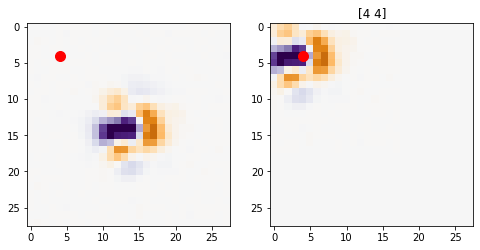

In [7]:
i = np.random.randint(num_weights)
w = W[i].copy()
w_new = shift_pad(w, shifts[i][0], shifts[i][1])

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(w, cmap='PuOr')
plt.clim(-5, 5)
plt.plot(centers[i][1], centers[i][0], 'ro', markersize=10)

ax = fig.add_subplot(1, 2, 2)
plt.imshow(w_new, cmap='PuOr')
plt.clim(-5, 5)
plt.plot(centers[i][1], centers[i][0], 'ro', markersize=10)
plt.title(centers[i])

In [8]:
num_weights = 10000
dim = (28, 28)
center = (20, 20)
size, spatial_freq = 2.5, 2
scale=1

W = V1_weights(num_weights, dim, size, spatial_freq, center=center, seed=35)

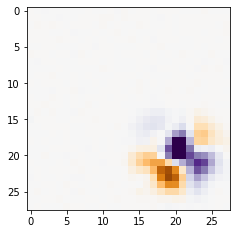

In [9]:
i = np.random.randint(num_weights)
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
plt.imshow(W[1947].reshape(dim), cmap='PuOr')
plt.clim(-4, 4)

In [14]:
# test that the V1 weights scripts generates weights with multiple centers
dim = (28, 28)
from scipy.ndimage.measurements import center_of_mass
W = V1_weights(200, dim, 2.5, 2, center=None, seed=35)
W = W.reshape(-1, dim[0], dim[1])

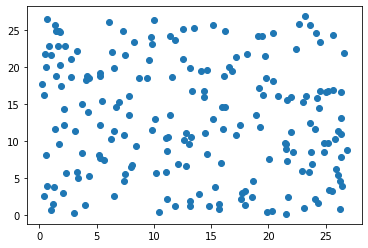

In [15]:
com = np.array([center_of_mass(np.abs(img) ** 4) for img in W])

fig = plt.figure()
plt.plot(com[:, 1], com[:, 0], 'o')